In [9]:
import os
import pandas as pd
import pcntoolkit as ptk
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# --构建模型的x、y
allHC = pd.read_csv('/Volumes/QCI/NormativeModel/FeatureData/StructureFeature/allstruc/combat/allHC_ThickAvg_combat.csv')
anding = allHC.loc[allHC['site'] == 'anding']                                               # 获取site = "anding"
                                                                      # 加一列，标识站点 - 0
allHCP = allHC.loc[allHC['site'] != 'anding']    # 获取其他站点的数据(此时的allHC,从allHC中排除了


In [11]:
#--要训练的脑区
idps = ['17Networks_RH_VisCent_ExStr_1','17Networks_RH_VisCent_Striate_1','17Networks_RH_VisCent_ExStr_9','17Networks_RH_SalVentAttnA_ParOper_2', '17Networks_RH_SalVentAttnA_Ins_4','17Networks_RH_SalVentAttnA_ParMed_4','17Networks_LH_TempPar_3','17Networks_LH_SalVentAttnA_Ins_4','17Networks_LH_ContA_IPS_3','17Networks_LH_DefaultA_pCunPCC_7'
        ]

In [12]:
# --构建模型的x、y
pro_dir = '/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/'
if not os.path.isdir(pro_dir):
    os.mkdir(pro_dir)
os.chdir(pro_dir)
pro_dir = os.getcwd()
allHC_X_train = (allHC[['sex','age']]).to_numpy(dtype=float)
allHC_Y_train = allHC[idps].to_numpy(dtype=float)

# sexage = pd.DataFrame(allHC_X_train)
# sexage.to_csv('sexage.csv')
# grey = pd.DataFrame(allHC_Y_train)
# grey.to_csv('grey.csv')

with open('allHC_X_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHC_X_train), file)

with open('allHC_Y_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHC_Y_train), file)

In [13]:
# --生成对应路径，方便传入参数
allHC_covfile = os.path.join(pro_dir,'allHC_X_train.pkl')  # covariates (eg age) the training samples (columns: covariates, rows: observations or subjects)
allHC_respfile = os.path.join(pro_dir,'allHC_Y_train.pkl')  # measurements  (eg cortical thickness) of the training samples (columns: the various features/ROIs, rows: observations or subjects)
output_path = os.path.join(pro_dir, 'Models/')  # output path, where the models will be written
log_dir = os.path.join(pro_dir, 'log/')
if not os.path.isdir(output_path):
    os.mkdir(output_path)
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)

outputsuffix = '_AllHC_estimate'
# --训练模型
ptk.normative.estimate(covfile=allHC_covfile,
                       respfile=allHC_respfile,
                       cvfolds=2,
                       alg='gpr',
                       log_path=log_dir,
                       output_path=output_path,
                       outputsuffix=outputsuffix,
                       savemodel=True)

Processing data in /Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/allHC_Y_train.pkl
Estimating model  1 of 10
Optimization terminated successfully.
         Current function value: -124.911586
         Iterations: 30
         Function evaluations: 78
         Gradient evaluations: 78
Estimating model  2 of 10
Optimization terminated successfully.
         Current function value: -331.428013
         Iterations: 78
         Function evaluations: 230
         Gradient evaluations: 220
Estimating model  3 of 10
Optimization terminated successfully.
         Current function value: -317.931426
         Iterations: 41
         Function evaluations: 95
         Gradient evaluations: 95
Estimating model  4 of 10
Optimization terminated successfully.
         Current function value: -131.588217
         Iterations: 61
         Function evaluations: 193
         Gradient evaluations: 187
Estimating model  5 of 10
Optimization terminat

/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -257.039364
         Iterations: 40
         Function evaluations: 151
         Gradient evaluations: 139
Estimating model  4 of 10
Optimization terminated successfully.
         Current function value: -122.338217
         Iterations: 52
         Function evaluations: 108
         Gradient evaluations: 108
Estimating model  5 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -75.608774
         Iterations: 100
         Function evaluations: 252
         Gradient evaluations: 247
Estimating model  6 of 10
Optimization terminated successfully.
         Current function value: -216.487967
         Iterations: 30
         Function evaluations: 69
         Gradient evaluations: 69
Estimating model  7 of 10
Optimization terminated successfully.
         Current function value: -176.108637
         Iterations: 34
         Function evaluations: 82
         Gradient evaluations: 82
Estimating model  8 of 10
Optimization terminated successfully.
         Current function value: -80.966637
         Iterations: 27
         Function evaluations: 65
         Gradient evaluations: 65
Estimating model  9 of 10
Optimization terminated successfully.
         Current function value: -329.429738
         Iterations: 46
         Function evaluations: 103
         Gradient evaluations: 103
Estimating model  10 of 10
Optimization terminated succe

In [14]:
# 使用虚拟数据，构建轨迹线，首先是使用虚拟数据为测试集，得到yhat
allHCtest_covariate = {'sex': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
                          'age': [20, 22, 24, 26, 28, 30, 32, 34, 36, 37]}
allHCtest_covariate = pd.DataFrame(data=allHCtest_covariate)
with open('allHCtest_covariate.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHCtest_covariate), file)
allHC_testcovfile = os.path.join(pro_dir, 'allHCtest_covariate.pkl')
outputsuffix = '_allHC_test'
# --训练模型
ptk.normative.estimate(covfile=allHC_covfile,
                       respfile=allHC_respfile,
                       testcov=allHC_testcovfile,
                       cvfolds=None,
                       alg='gpr',
                       log_path=log_dir,
                       output_path=output_path,
                       outputsuffix=outputsuffix,
                       savemodel=True)

Processing data in /Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/allHC_Y_train.pkl
Estimating model  1 of 10
Optimization terminated successfully.
         Current function value: -227.127368
         Iterations: 22
         Function evaluations: 64
         Gradient evaluations: 63
Estimating model  2 of 10
Optimization terminated successfully.
         Current function value: -658.021866
         Iterations: 53
         Function evaluations: 140
         Gradient evaluations: 132
Estimating model  3 of 10
Optimization terminated successfully.
         Current function value: -585.701745
         Iterations: 58
         Function evaluations: 143
         Gradient evaluations: 143
Estimating model  4 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -268.621584
         Iterations: 37
         Function evaluations: 161
         Gradient evaluations: 144
Estimating model  5 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -143.028025
         Iterations: 29
         Function evaluations: 136
         Gradient evaluations: 116
Estimating model  6 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -469.544421
         Iterations: 100
         Function evaluations: 269
         Gradient evaluations: 269
Estimating model  7 of 10
Optimization terminated successfully.
         Current function value: -382.834218
         Iterations: 51
         Function evaluations: 158
         Gradient evaluations: 150
Estimating model  8 of 10
Optimization terminated successfully.
         Current function value: -191.630019
         Iterations: 41
         Function evaluations: 106
         Gradient evaluations: 105
Estimating model  9 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -652.673725
         Iterations: 55
         Function evaluations: 191
         Gradient evaluations: 179
Estimating model  10 of 10
         Current function value: -683.604962
         Iterations: 61
         Function evaluations: 182
         Gradient evaluations: 170
Saving model meta-data...
Writing outputs ...


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


CI95
 [[0.16453994 0.11525793 0.12312776 0.16575917 0.1711856  0.13380296
  0.14296922 0.16742882 0.11438841 0.11360116]
 [0.05065807 0.03598593 0.03826677 0.04858433 0.05365214 0.04169868
  0.04466076 0.05197632 0.03589325 0.03536184]
 [0.04408457 0.03146664 0.0332009  0.04245141 0.04726111 0.03640424
  0.03907646 0.0454241  0.03162469 0.03075872]
 [0.03762135 0.02681429 0.02839284 0.03610677 0.04012221 0.03103223
  0.0332903  0.03867687 0.02685847 0.02627411]
 [0.03834512 0.02732085 0.028948   0.03677591 0.04085054 0.03162036
  0.03391709 0.03940587 0.02734772 0.02678201]
 [0.03966577 0.02827049 0.02992943 0.03807554 0.04230704 0.03271631
  0.0350983  0.04078097 0.02832105 0.02769748]
 [0.04054324 0.02889112 0.03061018 0.03890506 0.0432113  0.03344048
  0.03586752 0.0416729  0.02892327 0.02832074]
 [0.04984425 0.03555615 0.03755229 0.04799503 0.05336548 0.04114857
  0.04415063 0.05134063 0.03569902 0.03477848]
 [0.10461998 0.07466238 0.07815941 0.10227021 0.11306572 0.08636427
  0.09

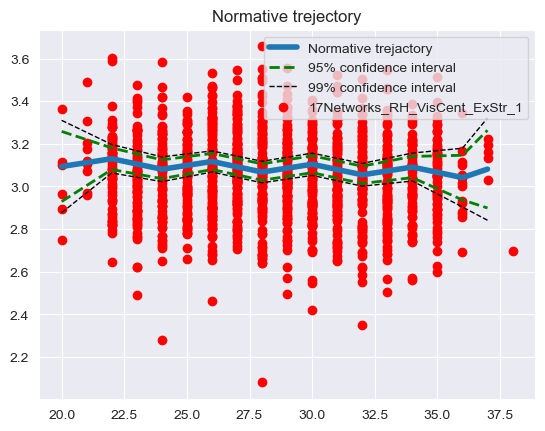

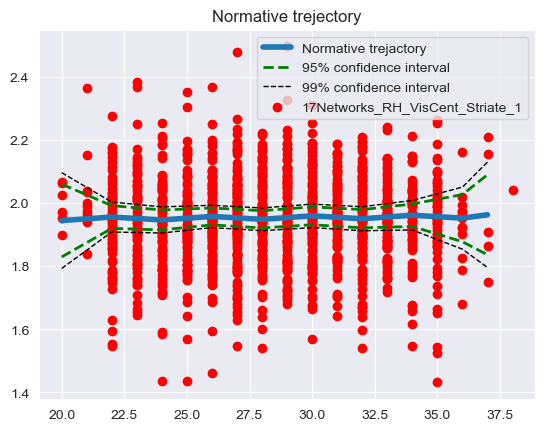

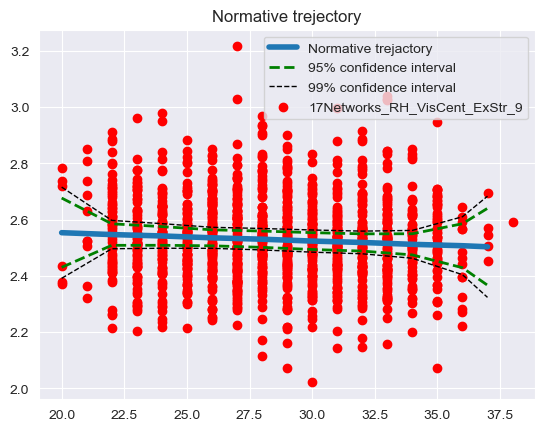

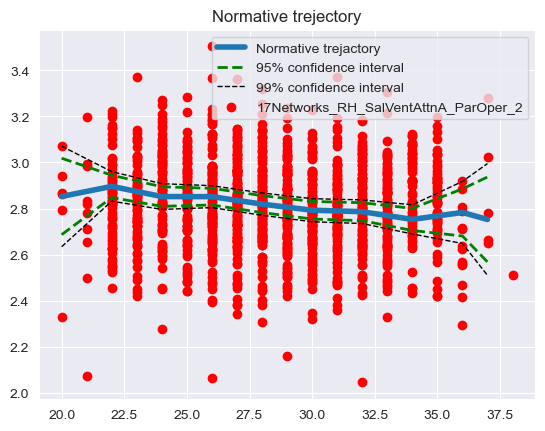

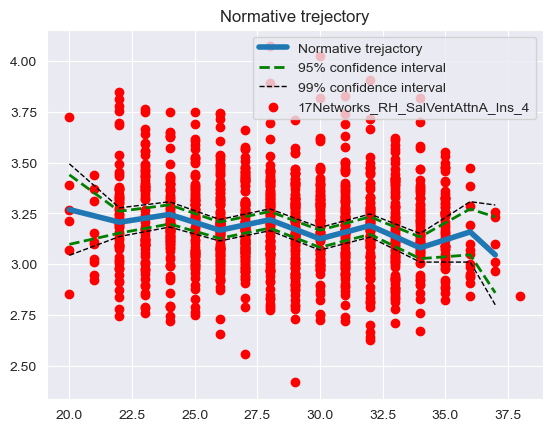

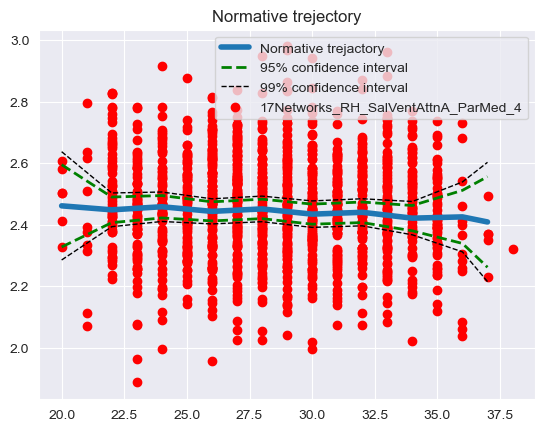

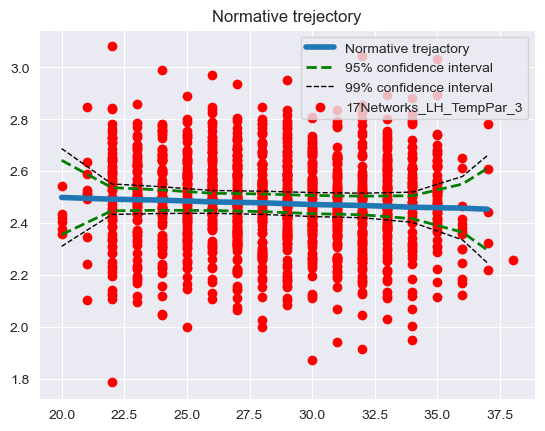

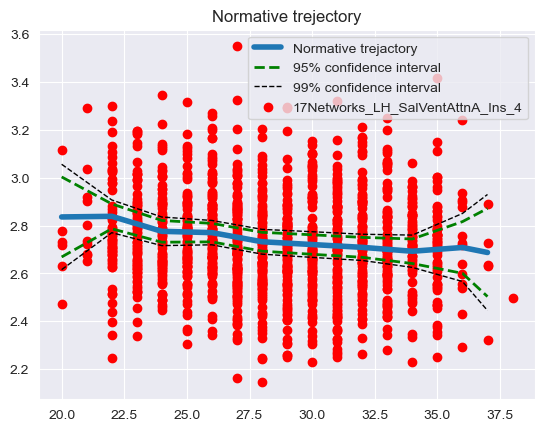

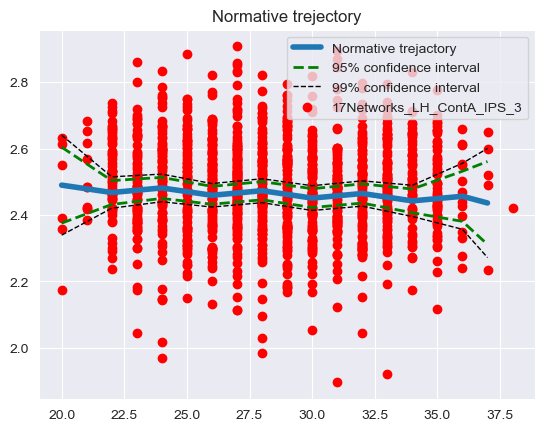

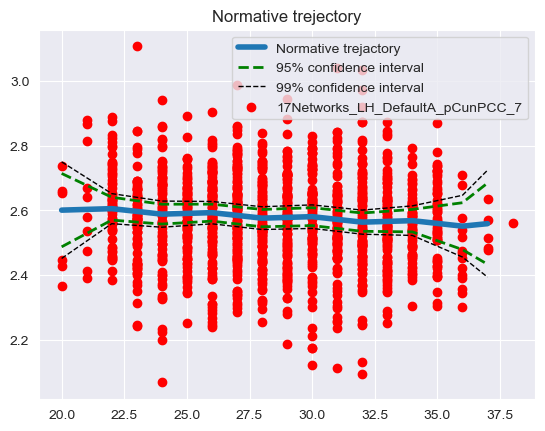

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# confidence interval calculation at x_forward
def confidence_interval(s2,x,z):
  CI = np.zeros((len(x_forward),len(idps)))
  for i,xdot in enumerate(x_forward):
    ci_inx = np.isin(x,xdot)
    S2 = s2[ci_inx]
    S_hat = np.mean(S2,axis=0)
    n = S2.shape[0]
    CI[i,:] = z*np.power(S_hat/n,.5)
  return CI
yhat_forward = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/yhat_allHCtest.pkl')   # 测试集的yhat
yhat_forward = yhat_forward.iloc[:,:].to_numpy(dtype=float)

x_forward=[20, 22, 24, 26, 28, 30, 32, 34, 36, 37]

x = allHC_X_train[:,1]    # 训练集的x 只取了年龄这一列
y = allHC_Y_train         # 训练集的y

s2 = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/ys2_AllHCestimate.pkl')   # 只有allHC训练集时，所输出的yhat
s2 = s2.iloc[:,:].to_numpy(dtype=float)

CI_95=confidence_interval(s2,x,1.96)
CI_99=confidence_interval(s2,x,2.58)
print('CI95\n',CI_95)
print('CI99\n',CI_99)
for idp_num,idp_name in enumerate(idps):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(x_forward,yhat_forward[:,idp_num], linewidth=4, label='Normative trejactory')


    ax.plot(x_forward,CI_95[:,idp_num]+yhat_forward[:,idp_num], linewidth=2,linestyle='--',c='g', label='95% confidence interval')
    ax.plot(x_forward,-CI_95[:,idp_num]+yhat_forward[:,idp_num], linewidth=2,linestyle='--',c='g')

    ax.plot(x_forward,CI_99[:,idp_num]+yhat_forward[:,idp_num], linewidth=1,linestyle='--',c='k', label='99% confidence interval')
    ax.plot(x_forward,-CI_99[:,idp_num]+yhat_forward[:,idp_num], linewidth=1,linestyle='--',c='k')

    ax.scatter(x,y[:,idp_num],c='r', label=idp_name)
    plt.legend(loc='upper right')
    plt.title('Normative trejectory')
    plt.show()
    plt.close()

In [18]:
RMSE_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/RMSE_AllHCestimate.pkl')
SMSE_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/SMSE_AllHCestimate.pkl')
Rho_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/Rho_AllHCestimate.pkl')
pRho_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/ThickAvg/Result_GPR_all/pRho_AllHCestimate.pkl')

df_RMSE = pd.concat([RMSE_estimate, SMSE_estimate, Rho_estimate,pRho_estimate], axis=1)  # 将两列拼接在一起，axis=1 表示按列拼接
df_RMSE.columns = ['RMSE_estimate', 'SMSE_estimate','Rho_estimate','pRho_estimate']
print(df_RMSE)

   RMSE_estimate  SMSE_estimate  Rho_estimate  pRho_estimate
0       0.200654       0.992286      0.100065       0.000344
1       0.142784       1.005616     -0.018686       0.505251
2       0.151578       1.007654      0.010385       0.711203
3       0.195610       1.016449      0.046401       0.097833
4       0.213862       0.984535      0.126502       0.000006
5       0.166594       1.015364     -0.026702       0.341001
6       0.177234       1.003438      0.010055       0.719979
7       0.205829       0.989244      0.106657       0.000135
8       0.143789       1.007088      0.015260       0.586382
9       0.140340       1.002949      0.046933       0.094046
